In [1]:
%load_ext autoreload
%autoreload 2
import os

import matplotlib as mpl
import numpy as np
import pandas as pd

mpl.rcParams['figure.dpi'] = 250

# change working directory to project root
while os.getcwd().split('/')[-1] != 'imodels-experiments':
    os.chdir('..')

from imodels.util.data_util import get_clean_dataset
from config.saps.datasets import DATASETS_CLASSIFICATION, DATASETS_REGRESSION

pd.options.display.max_rows = 100

In [2]:
def add_citations(m_print):
    citations = {'ionosphere': 'sigillito1989classification',
             'diabetes': 'smith1988using', 
#              'german-credit': '',
             'juvenile': 'osofsky1997effects',
             'credit': 'yeh2009comparisons',
#              'recidivism',
#              'readmission': '',
                 
                 # regression
                 'friedman1': 'friedman1991multivariate',
                 'friedman2': 'friedman1991multivariate',
                 'friedman3': 'friedman1991multivariate',
                 'abalone': 'nash1994population',
                 'diabetes-regr': 'efron2004least',
                 'california-housing': 'pace1997sparse',
                 'satellite-image': 'romano2020pmlb',
                 'echo-months': 'romano2020pmlb',
                 'breast-tumor': 'romano2020pmlb',
            }
    
    for i in m_print.index.values:
        name = m_print.at[i, 'Name'].lower()
        if name in citations:
            m_print.at[i, 'Name'] = name.capitalize().replace('-', ' ') + ' \cite{' + citations[name] + '}'
        else:
            m_print.at[i, 'Name'] = name.capitalize().replace('-', ' ')
    return m_print

# classification dataset stats

In [3]:
metadata = []
columns = ['Name', 'Samples', 'Features', 'Class 0', 'Class 1', 'Majority class %']
for dset_name, dset_file, data_source in DATASETS_CLASSIFICATION:
    X, y, feat_names = get_clean_dataset(dset_file, data_source)
    #     X = np.nan_to_num(X, 0)
    shape = X.shape
    class_counts = np.unique(y, return_counts=True)[1]
    metadata.append([dset_name.capitalize(), shape[0], shape[1], class_counts[0], class_counts[1],
                     np.round(100 * np.max(class_counts) / np.sum(class_counts), decimals=1)])

metadata = pd.DataFrame(metadata, columns=columns).sort_values(by=['Samples'])  #.set_index('Name')
# m_print = metadata[['Name', 'Samples', 'Features']]
m_print = metadata
m_print = m_print[m_print.Samples > 306]
m_print = add_citations(m_print)
print(m_print.to_latex(index=False, escape=False).replace('%', '\%'))
# m_print
# metadata

\begin{tabular}{lrrrrr}
\toprule
                                         Name &  Samples &  Features &  Class 0 &  Class 1 &  Majority class \% \\
\midrule
Ionosphere \cite{sigillito1989classification} &      351 &        34 &      126 &      225 &              64.1 \\
               Diabetes \cite{smith1988using} &      768 &         8 &      500 &      268 &              65.1 \\
                                German credit &     1000 &        20 &      300 &      700 &              70.0 \\
           Juvenile \cite{osofsky1997effects} &     3640 &       286 &     3153 &      487 &              86.6 \\
                                   Recidivism &     6172 &        20 &     3182 &     2990 &              51.6 \\
             Credit \cite{yeh2009comparisons} &    30000 &        33 &    23364 &     6636 &              77.9 \\
                                  Readmission &   101763 &       150 &    54861 &    46902 &              53.9 \\
\bottomrule
\end{tabular}



# regression dataset names


In [4]:
metadata = []
columns = ['Name', 'Samples', 'Features', 'Mean', 'Std', 'Min', "Max"]
for dset_name, dset_file, data_source in DATASETS_REGRESSION:
    #     print(dset_name, dset_file, data_source)
    X, y, feat_names = get_clean_dataset(dset_file, data_source)
    #     X = np.nan_to_num(X, 0)
    #     print(y.dtype)
    #     print(np.unique(y))
    shape = X.shape
    metadata.append([dset_name.capitalize(), shape[0], shape[1], np.mean(y), np.std(y), np.min(y), np.max(y)])

    
    
metadata = pd.DataFrame(metadata, columns=columns).round(1).sort_values(by=['Samples'], ascending=False)
#.set_index('Name')
# print(add_citations(metadata[['Name', 'Samples', 'Features']]).to_latex(index=False, escape=False).replace('regr', ''))
print(add_citations(metadata).to_latex(index=False, escape=False).replace('regr', ''))
metadata

\begin{tabular}{lrrrrrr}
\toprule
                                     Name &  Samples &  Features &  Mean &   Std &  Min &    Max \\
\midrule
       Breast tumor \cite{romano2020pmlb} &   116640 &         9 &  24.7 &  10.3 & -8.5 &   62.0 \\
 California housing \cite{pace1997sparse} &    20640 &         8 &   2.1 &   1.2 &  0.1 &    5.0 \\
        Echo months \cite{romano2020pmlb} &    17496 &         9 &  22.0 &  15.8 & -4.4 &   74.6 \\
    Satellite image \cite{romano2020pmlb} &     6435 &        36 &   3.7 &   2.2 &  1.0 &    7.0 \\
        Abalone \cite{nash1994population} &     4177 &         8 &   9.9 &   3.2 &  1.0 &   29.0 \\
      Diabetes  \cite{efron2004least} &      442 &        10 & 152.1 &  77.0 & 25.0 &  346.0 \\
Friedman1 \cite{friedman1991multivariate} &      200 &        10 &  14.3 &   4.8 &  3.1 &   25.5 \\
Friedman2 \cite{friedman1991multivariate} &      200 &         4 & 483.5 & 385.8 & 17.0 & 1654.6 \\
Friedman3 \cite{friedman1991multivariate} &      200 &       

,Name,Samples,Features,Mean,Std,Min,Max
8,Breast tumor \cite{romano2020pmlb},116640,9,24.7,10.3,-8.5,62.0
5,California housing \cite{pace1997sparse},20640,8,2.1,1.2,0.1,5.0
7,Echo months \cite{romano2020pmlb},17496,9,22.0,15.8,-4.4,74.6
6,Satellite image \cite{romano2020pmlb},6435,36,3.7,2.2,1.0,7.0
3,Abalone \cite{nash1994population},4177,8,9.9,3.2,1.0,29.0
4,Diabetes regr \cite{efron2004least},442,10,152.1,77.0,25.0,346.0
0,Friedman1 \cite{friedman1991multivariate},200,10,14.3,4.8,3.1,25.5
1,Friedman2 \cite{friedman1991multivariate},200,4,483.5,385.8,17.0,1654.6
2,Friedman3 \cite{friedman1991multivariate},200,4,1.3,0.3,0.0,1.6


In [5]:
X, y, feature_names = get_clean_dataset('183', data_source='openml')
np.unique(X[:, 1:])

array([0.0000e+00, 5.0000e-04, 1.0000e-03, ..., 2.6570e+00, 2.7795e+00,
       2.8255e+00])

In [6]:
classes, y = np.unique(X[:, 0], return_inverse=True)  # deals with str inputs

In [7]:
classes, d2 = np.unique(d, return_inverse=True)  # deals with str inputs

NameError: name 'd' is not defined

In [10]:
import matplotlib.pyplot as plt

(array([1.4644e+04, 1.0457e+04, 3.3920e+03, 2.2640e+03, 6.3400e+02,
        2.8800e+02, 1.2700e+02, 1.5880e+03, 1.6000e+01, 6.0000e+00]),
 array([0.     , 0.28255, 0.5651 , 0.84765, 1.1302 , 1.41275, 1.6953 ,
        1.97785, 2.2604 , 2.54295, 2.8255 ]),
 <BarContainer object of 10 artists>)

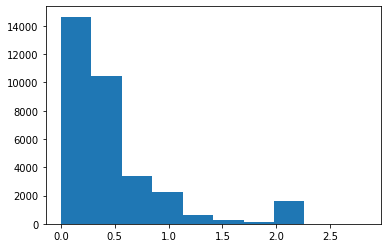

In [11]:
plt.hist(X.flatten())

In [10]:
X, y, feature_names = get_clean_dataset('diabetes', data_source='pmlb')
print('shapes', X.shape, y.shape, np.unique(y))

shapes (768, 8) (768,) [0 1]


In [12]:
from imodels import C45TreeClassifier

m = C45TreeClassifier(max_rules=100)
m.fit(X, y)
print('mse', np.mean(np.square(m.predict(X) - y)))
print(m)

mse 0.3658127842949485
<?xml version="1.0" ?>
<GreedyTree>
	<X_0 feature="2.0" flag="l" p="0.634">
		<X_0 feature="1.0" flag="l" p="0.493">0</X_0>
		<X_0 feature="1.0" flag="r" p="0.507">1</X_0>
	</X_0>
	<X_0 feature="2.0" flag="r" p="0.366">2</X_0>
</GreedyTree>

